# Packages

In [1]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import arviz
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths and dataset

In [2]:
results_path = '../../LargeFilesResults/Model'  # where the outputs of this notebook will be saved

In [3]:
betas_cols = list(np.arange(start=3, stop=28, step=1))

In [4]:
posteriors = pd.read_csv(os.path.join(results_path, 'entirefit_shared_revised.csv'), usecols=betas_cols)
summary    = pd.read_csv(os.path.join(results_path, 'fit_summary_shared_revised.csv'))

In [5]:
posteriors

,"beta[1,1]","beta[2,1]","beta[3,1]","beta[4,1]","beta[5,1]","beta[1,2]","beta[2,2]","beta[3,2]","beta[4,2]","beta[5,2]",...,"beta[1,4]","beta[2,4]","beta[3,4]","beta[4,4]","beta[5,4]","beta[1,5]","beta[2,5]","beta[3,5]","beta[4,5]","beta[5,5]"
0,-0.604396,0.221881,-0.384665,0.369040,0.074561,-0.147063,-0.066301,-0.398462,0.296315,-0.044577,...,-0.580765,0.414047,-0.395009,0.278790,-0.186404,-0.209421,0.031876,-0.309521,-0.260725,0.159310
1,-0.373872,-0.472048,0.241929,0.014319,0.045524,-0.306858,0.039983,-0.148301,0.107499,-0.060551,...,-0.012848,0.000202,0.026190,-0.009497,-0.139233,-0.135498,0.185861,0.311628,0.016811,0.153794
2,-0.175988,-0.201281,-0.294484,0.283588,-0.041565,-0.071495,-0.035292,-0.310161,0.148746,-0.102467,...,0.021804,-0.095789,0.284169,-0.201287,0.014140,0.096474,-0.237096,-0.191076,-0.087990,-0.040664
3,-0.508541,-0.209383,0.274018,0.289860,-0.034329,-0.255923,0.187346,0.004045,0.282956,-0.197544,...,-0.058764,-0.387333,-0.162123,0.011464,-0.105095,0.141889,-0.242720,-0.128274,-0.029956,0.045983
4,-0.397743,0.275128,0.112396,0.069849,0.159073,0.032999,-0.150373,0.069434,0.122253,-0.072867,...,0.106690,0.176292,-0.034297,0.055742,0.005410,-0.019741,-0.099631,-0.102008,-0.031886,0.019835
5,-0.303604,0.202373,0.018312,0.103391,0.216269,0.039218,-0.195208,0.126115,0.181142,-0.037626,...,0.230546,0.072420,-0.034408,-0.060087,0.014574,0.045763,-0.180876,-0.042307,-0.042143,-0.084099
6,-0.115715,-0.112188,0.072253,0.131599,-0.135516,-0.114610,0.118444,0.003505,0.032791,-0.020873,...,-0.396798,-0.043182,-0.058900,0.115860,-0.089771,-0.034256,0.071517,0.022333,0.118502,0.149162
7,-0.409027,0.033988,-0.026519,0.194794,-0.118710,0.030645,0.173776,-0.082888,0.039008,0.020307,...,-0.141151,-0.278078,0.224737,0.052619,-0.046078,-0.054673,0.085913,0.057847,0.102795,0.111212
8,-0.104265,-0.209743,-0.147088,0.101528,-0.003837,-0.182652,-0.215586,0.098740,0.256113,-0.246169,...,0.089473,0.236373,-0.027235,0.049323,-0.033524,-0.174179,-0.040115,-0.103869,-0.118115,0.048689
9,-0.399036,0.126855,0.055858,-0.010775,-0.002200,-0.090962,0.198992,-0.319062,0.054715,0.018245,...,-0.440809,-0.512225,-0.096569,-0.169979,-0.103108,-0.059284,-0.122007,0.012945,-0.022113,0.132511


In [6]:
parameters = summary[['LOG_STELLAR_MASS', 'Z']]

In [7]:
param_short = parameters.iloc[:900]

In [8]:
param_short.describe()

,LOG_STELLAR_MASS,Z
count,900.000000,900.000000
mean,10.000000,0.208120
std,0.597259,0.083724
min,9.000000,0.067940
25%,9.482759,0.135613
50%,10.000000,0.208120
75%,10.517241,0.280627
max,11.000000,0.348300


# Posteriors

In [9]:
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']*5
figsize      = (20, 20)
alpha        = 0.4

In [10]:
columns = list(posteriors.keys())

/home/mlldantas/anaconda3/envs/py3k6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


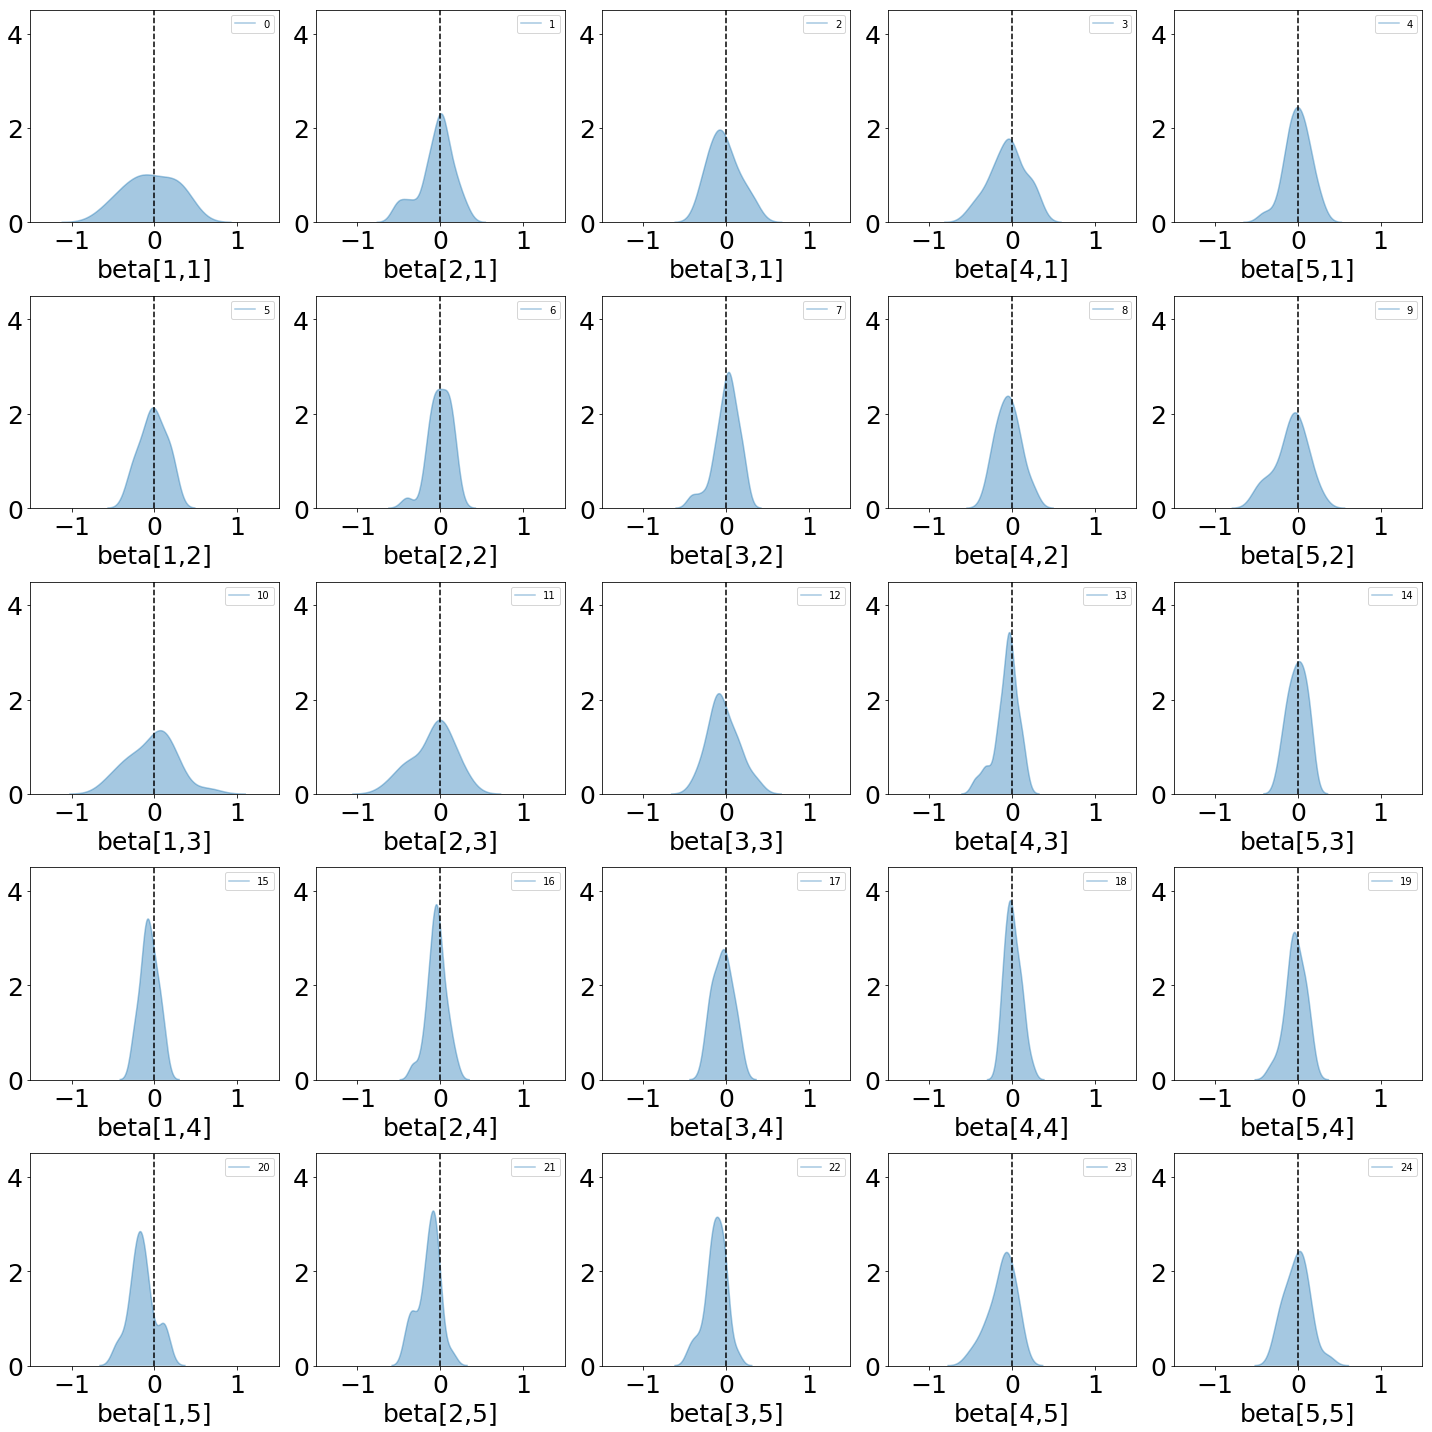

In [11]:
plt.subplots(figsize=figsize)
position = 1
for i in range(len(columns)):
    plot = plt.subplot(5, 5, position)
    sns.kdeplot(posteriors.iloc[i], shade=True, alpha=alpha)
    plt.xlabel(r"%s" % str(columns[i]), fontsize=25)
    plt.axvline(x=0, linestyle="--", color='black')
    plt.tick_params('both', labelsize='25')
    plt.xlim([-1.5,1.5])
    plt.ylim([0,4.5])
    position+=1
#     if (i==0):
#         plt.ylabel("$\,$ WHAN \n %s" % whan_classes[position], fontsize=25)
    plt.tight_layout()
plt.show()